In [82]:
import numpy as np
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
sns.set_style("whitegrid")
from pprint import pprint
import sqlite3
import yaml
import re
from datetime import datetime
import maya
from collections import Counter
from glob import glob
import ast
import json
from sklearn.preprocessing import StandardScaler

try: # for pip >= 10
    from pip._internal.req import parse_requirements
except ImportError: # for pip <= 9.0.3
    from pip.req import parse_requirements

from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

import networkx as nx
import networkx.algorithms.community as nxcom

import bokeh.io
from bokeh.io import output_file, show
from bokeh.resources import INLINE
from bokeh.models import (BoxSelectTool, Circle, EdgesAndLinkedNodes, HoverTool,
                          MultiLine, NodesAndLinkedEdges, Plot, Range1d, TapTool,
                         BoxZoomTool, ResetTool, OpenURL, CustomJS, Column, SaveTool)
from bokeh.palettes import Spectral4
from bokeh.plotting import figure, output_notebook
from bokeh.models.graphs import from_networkx
from bokeh.models import TextInput, Button

%matplotlib inline

# Code for hiding seaborn warnings
import warnings
warnings.filterwarnings("ignore")

## Easier navigation:

------------------------------------

### 1. <a href='#setup'>Setup</a>
------------------------------------
### 2. <a href='#heatmap'>Heatmap</a>
### 3. <a href='#scatter'>Scatterplots</a>
------------------------------------


<a name='setup'></a>
## 1. Setup


<br>

In [83]:
with open('q_df.txt') as f:
    reloaded_example = json.load(f)

In [84]:
df = pd.read_json(reloaded_example)
tm = "real"
df["Observed Outgoing Dep"] = df["Outgoing Dep"] - df["dependencies drained count"]
df

,library,dependencies,total size,size_full,Contributors,Forks,Open Issues/PRs,SourceRank,Stars,Total releases,...,real_time_constant_max,dependencies full,Incoming Dep,Outgoing Dep,Degree,Authority,size,dependencies drained,dependencies drained count,Observed Outgoing Dep
0,matplotlib,"[numpy, cycler, pillow, python-dateutil, pypar...",60.000,35M /home/ubuntu/ve/randomenv/lib/python3.6/si...,763.0,5874.0,1663.0,28.0,13806.0,68.0,...,0.824,"[six, pyparsing, cycler, numpy, kiwisolver, pi...",75,7,0.073345,0.003557,35.000,[],0,7
1,numpy,[],25.000,25M /home/ubuntu/ve/randomenv/lib/python3.6/si...,736.0,5616.0,2333.0,29.0,17445.0,101.0,...,0.806,[],271,0,0.242397,0.009493,25.000,[],0,0
2,pandas,"[pytz, numpy, python-dateutil]",74.800,47M /home/ubuntu/ve/randomenv/lib/python3.6/si...,970.0,12560.0,3669.0,28.0,30122.0,93.0,...,0.831,"[pytz, six, numpy, python-dateutil]",105,4,0.097496,0.005825,47.000,[],0,4
3,scipy,[numpy],87.000,62M /home/ubuntu/ve/randomenv/lib/python3.6/si...,680.0,3755.0,1667.0,26.0,8312.0,66.0,...,0.802,[numpy],114,1,0.102862,0.003385,62.000,[],0,1
4,ipywidgets,"[widgetsnbextension, traitlets, ipykernel, nbf...",78.292,39M /home/ubuntu/ve/randomenv/lib/python3.6/si...,NaN,NaN,NaN,17.0,NaN,123.0,...,1.307,"[markupsafe, typing-extensions, backcall, nbfo...",44,53,0.086762,0.006981,0.864,[],0,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,imgkit,[six],0.060,11M /home/ubuntu/ve/randomenv/lib/python3.6/si...,7.0,62.0,NaN,16.0,628.0,31.0,...,0.802,[six],0,1,0.000894,0.000000,0.060,[],0,1
945,sphinx_tabs,"[sphinx, pygments, docutils]",65.700,30M /home/ubuntu/ve/randomenv/lib/python3.6/si...,14.0,43.0,NaN,18.0,157.0,28.0,...,0.944,"[markupsafe, sphinxcontrib-htmlhelp, pygments,...",0,24,0.021467,0.000000,-0.200,[],0,24
946,lea,[],0.716,11M /home/ubuntu/ve/randomenv/lib/python3.6/si...,0.0,3.0,NaN,9.0,NaN,50.0,...,0.805,[],0,0,0.000000,0.000000,0.716,[],0,0
947,requests-html,"[bs4, fake-useragent, requests, parse, pyppete...",22.080,15M /home/ubuntu/ve/randomenv/lib/python3.6/si...,41.0,823.0,NaN,18.0,11900.0,36.0,...,0.970,"[parse, urllib3, soupsieve, idna, beautifulsou...",0,13,0.011628,0.000000,17.124,"[parse, fake-useragent, pyppeteer, pyquery, w3...",5,8


In [79]:
df.columns

Index(['library', 'dependencies', 'total size', 'size_full', 'Contributors',
       'Forks', 'Open Issues/PRs', 'SourceRank', 'Stars', 'Total releases',
       'Version Number', 'Version Time', 'Watchers', 'count',
       'real_time_solo_median', 'real_time_solo_average', 'real_time_solo_std',
       'real_time_solo_max', 'real_time_full_median', 'real_time_full_average',
       'real_time_full_std', 'real_time_full_max', 'real_time_constant_median',
       'real_time_constant_average', 'real_time_constant_std',
       'real_time_constant_max', 'dependencies full', 'Incoming Dep',
       'Outgoing Dep', 'Degree', 'Authority', 'size', 'dependencies drained',
       'dependencies drained count', 'Observed Outgoing Dep'],
      dtype='object')

<a name='heatmap'></a>
## 2. Heatmap

<br>

<AxesSubplot:>

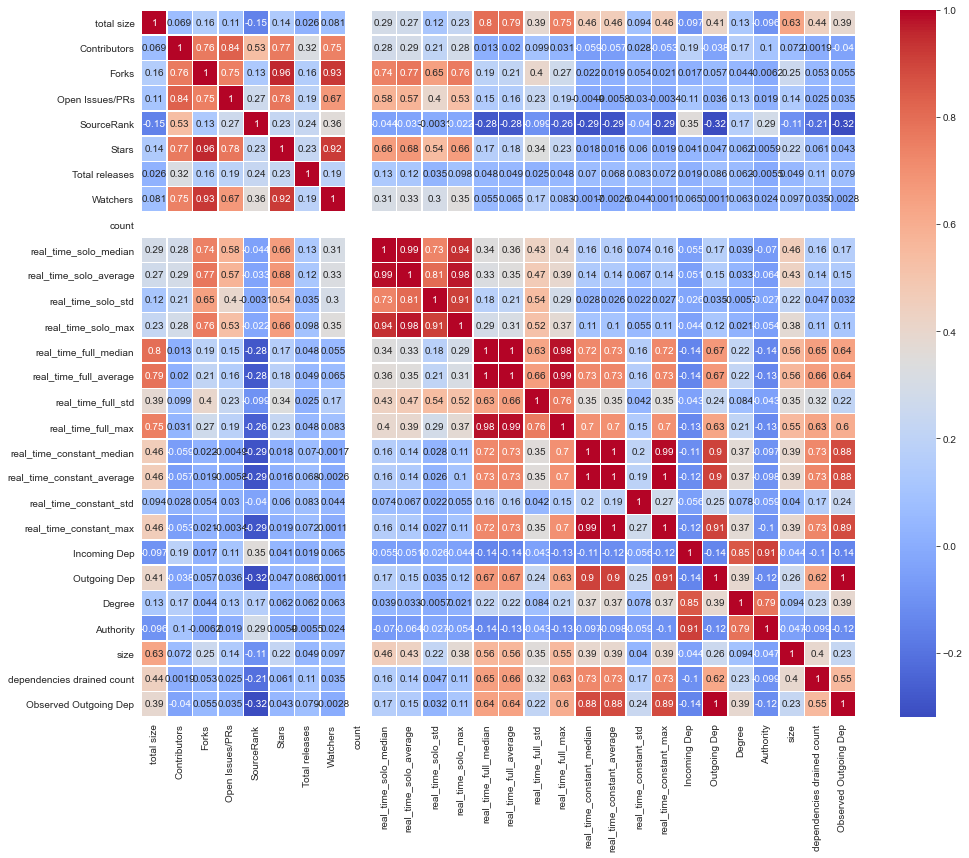

In [40]:
plt.figure(figsize=(16,13))
heatmap_df = df
#heatmap_df["real avg"] = heatmap_df["real avg"].astype(float)
corr = heatmap_df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=.5)

<AxesSubplot:>

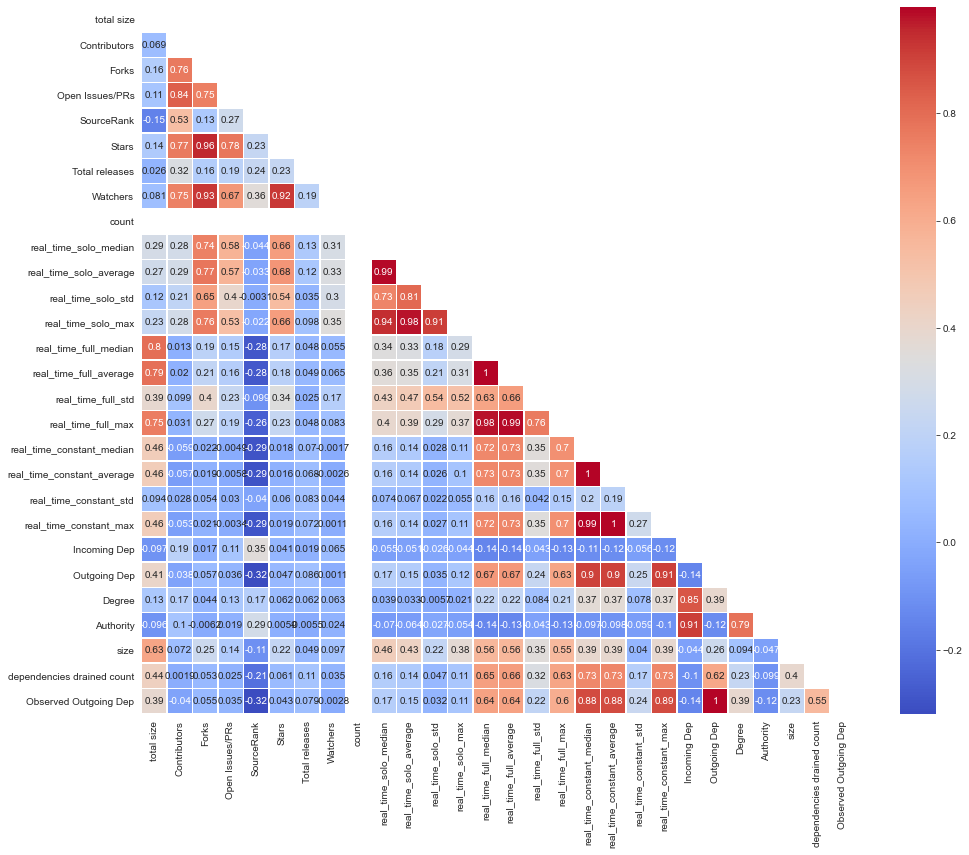

In [41]:
plt.figure(figsize=(16,13))
heatmap_df = df
#heatmap_df["real avg"] = heatmap_df["real avg"].astype(float)
corr = heatmap_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=.5, mask=mask)

<a name='scatter'></a>
## 3. Scatterplots

<br>

<AxesSubplot:xlabel='total size', ylabel='real_time_full_median'>

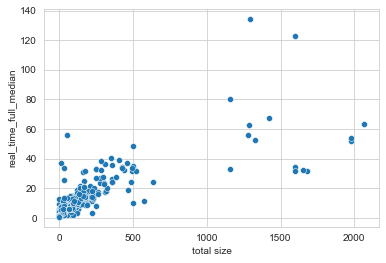

In [25]:
sns.scatterplot(x="total size", y=tm + "_time_full_median", data=df)

<AxesSubplot:xlabel='Contributors', ylabel='Open Issues/PRs'>

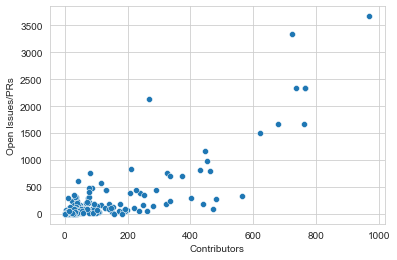

In [26]:
sns.scatterplot(x="Contributors", y="Open Issues/PRs", data=df)

<AxesSubplot:xlabel='Stars', ylabel='Forks'>

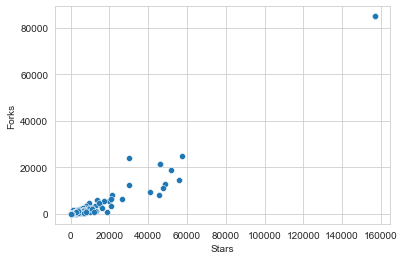

In [27]:
sns.scatterplot(x="Stars", y="Forks", data=df)

<AxesSubplot:xlabel='SourceRank', ylabel='real_time_full_median'>

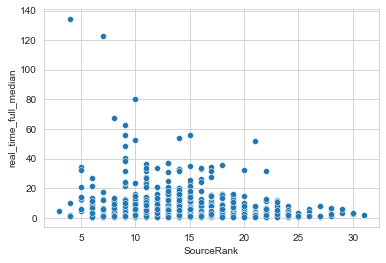

In [28]:
sns.scatterplot(x="SourceRank", y=tm + "_time_full_median", data=df)

Time against time:

<AxesSubplot:xlabel='real_time_solo_median', ylabel='real_time_full_median'>

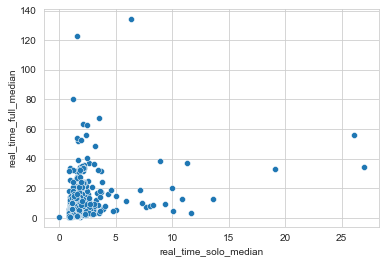

In [29]:
sns.scatterplot(x=tm + "_time_solo_median", y=tm + "_time_full_median", data=df)

<AxesSubplot:xlabel='real_time_solo_median', ylabel='real_time_constant_median'>

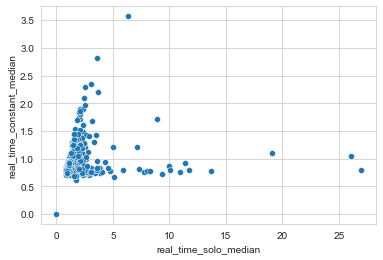

In [30]:
sns.scatterplot(x=tm + "_time_solo_median", y=tm + "_time_constant_median", data=df)

<AxesSubplot:xlabel='real_time_full_median', ylabel='real_time_constant_median'>

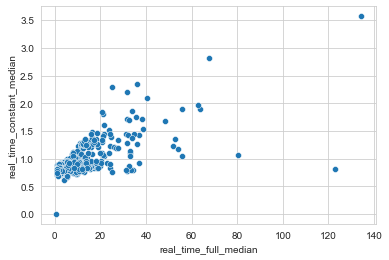

In [31]:
sns.scatterplot(x=tm + "_time_full_median", y=tm + "_time_constant_median", data=df)

Solo seems a little questionable so far, given its lower than expected correlation with individual size as well.

Authority = incoming dep

<AxesSubplot:xlabel='Incoming Dep', ylabel='Authority'>

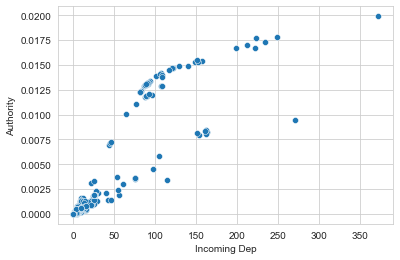

In [33]:
sns.scatterplot(x="Incoming Dep", y="Authority", data=df)

One thing confirmed here that I was curious about in the beginning was on how the constant time may be affected by number of dependencies for a package.

<AxesSubplot:xlabel='Outgoing Dep', ylabel='real_time_constant_median'>

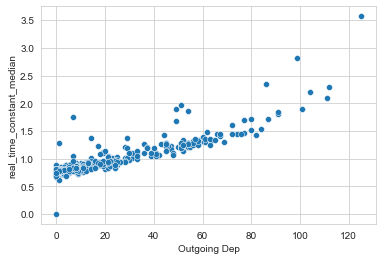

In [34]:
sns.scatterplot(x="Outgoing Dep", y=tm + "_time_constant_median", data=df)

And it should have some effect on full time taken, but not on solo.

<AxesSubplot:xlabel='Outgoing Dep', ylabel='real_time_full_median'>

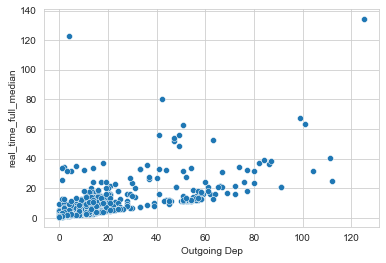

In [36]:
sns.scatterplot(x="Outgoing Dep", y=tm + "_time_full_median", data=df)

<AxesSubplot:xlabel='Outgoing Dep', ylabel='real_time_solo_median'>

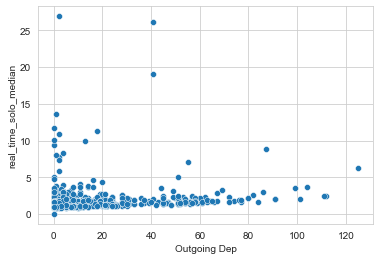

In [37]:
sns.scatterplot(x="Outgoing Dep", y=tm + "_time_solo_median", data=df)

<a name='hist'></a>
## 4. Histograms

<br>

In [42]:
df.columns

Index(['library', 'dependencies', 'total size', 'size_full', 'Contributors',
       'Forks', 'Open Issues/PRs', 'SourceRank', 'Stars', 'Total releases',
       'Version Number', 'Version Time', 'Watchers', 'count',
       'real_time_solo_median', 'real_time_solo_average', 'real_time_solo_std',
       'real_time_solo_max', 'real_time_full_median', 'real_time_full_average',
       'real_time_full_std', 'real_time_full_max', 'real_time_constant_median',
       'real_time_constant_average', 'real_time_constant_std',
       'real_time_constant_max', 'dependencies full', 'Incoming Dep',
       'Outgoing Dep', 'Degree', 'Authority', 'size', 'dependencies drained',
       'dependencies drained count', 'Observed Outgoing Dep'],
      dtype='object')

In [117]:
df1 = df.select_dtypes([np.int, np.float])

for col in df1.columns:
    if col != 'count':
        df1[col] = df1[(df1[col] > df1[col].quantile(0.00)) & (df1[col] < df1[col].quantile(0.90))]

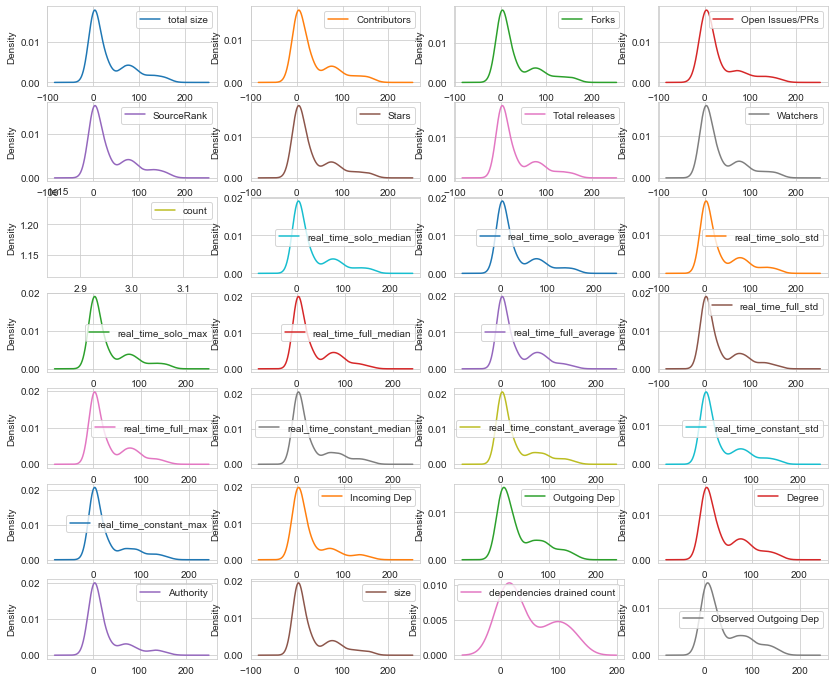

In [118]:
fig, axes = plt.subplots(nrows=7, ncols=4)
df1.plot(subplots=True, ax=axes, kind='kde')
fig.set_figheight(12)
fig.set_figwidth(14)

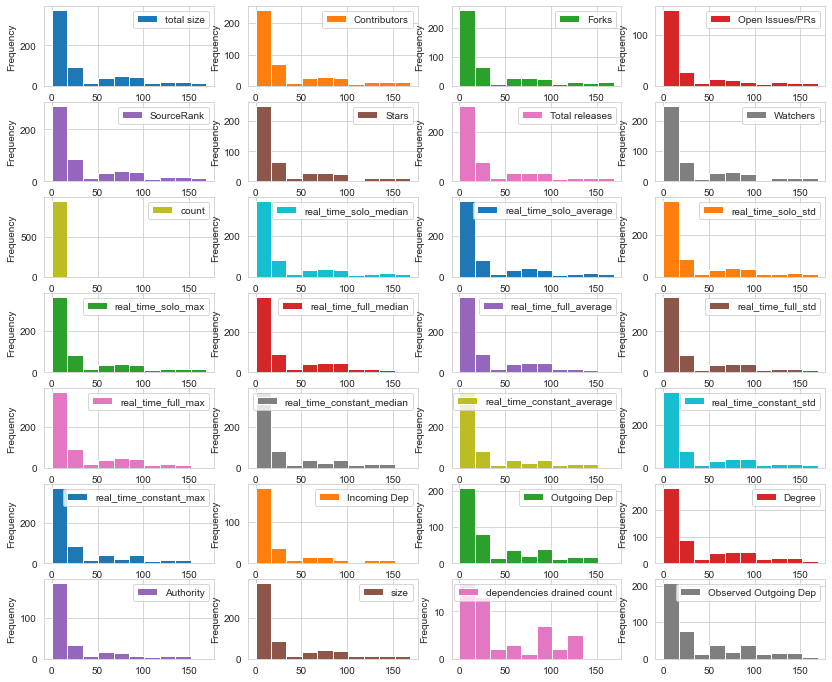

In [124]:
fig, axes = plt.subplots(nrows=7, ncols=4)
df1.plot(subplots=True, ax=axes, kind='hist')
fig.set_figheight(12)
fig.set_figwidth(14)

<a name='dep'></a>
## 5. Dependency Table and Iteration Tree Expansion

<br>

In [189]:
spec_df = pd.read_hdf('dependency_table.h5', 'df')

In [190]:
spec_df.head(50)

,numpy,pandas,fuzzywuzzy,bs4,geopandas,pycountry,matplotlib,seaborn,bokeh,sklearn,...,instapy,instapy-chromedriver,optimade-client,guessit,imdbparser,imdb-cli-tool,pyforest,hpbandster,pyswip,gputil
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [191]:
set_df = df.set_index("library")

In [192]:
set_df

,dependencies,total size,size_full,Contributors,Forks,Open Issues/PRs,SourceRank,Stars,Total releases,Version Number,...,real_time_constant_max,dependencies full,Incoming Dep,Outgoing Dep,Degree,Authority,size,dependencies drained,dependencies drained count,Observed Outgoing Dep
library,,,,,,,,,,,,,,,,,,,,,
matplotlib,"[numpy, cycler, pillow, python-dateutil, pypar...",60.000,35M /home/ubuntu/ve/randomenv/lib/python3.6/si...,763.0,5874.0,1663.0,28.0,13806.0,68.0,"[3.4.2, 3.4.1, 3.4.0, 3.4.0rc3, 3.4.0rc2, 3.4....",...,0.824,"[six, pyparsing, cycler, numpy, kiwisolver, pi...",75,7,0.073345,0.003557,35.000,[],0,7
numpy,[],25.000,25M /home/ubuntu/ve/randomenv/lib/python3.6/si...,736.0,5616.0,2333.0,29.0,17445.0,101.0,"[1.21.0, 1.21.0rc2, 1.21.0rc1, 1.20.3, 1.20.2,...",...,0.806,[],271,0,0.242397,0.009493,25.000,[],0,0
pandas,"[pytz, numpy, python-dateutil]",74.800,47M /home/ubuntu/ve/randomenv/lib/python3.6/si...,970.0,12560.0,3669.0,28.0,30122.0,93.0,"[1.2.5, 1.3.0rc1, 1.2.4, 1.2.3, 1.2.2, 1.2.1, ...",...,0.831,"[pytz, six, numpy, python-dateutil]",105,4,0.097496,0.005825,47.000,[],0,4
scipy,[numpy],87.000,62M /home/ubuntu/ve/randomenv/lib/python3.6/si...,680.0,3755.0,1667.0,26.0,8312.0,66.0,"[1.7.0, 1.7.0rc2, 1.7.0rc1, 1.6.3, 1.6.2, 1.6....",...,0.802,[numpy],114,1,0.102862,0.003385,62.000,[],0,1
ipywidgets,"[widgetsnbextension, traitlets, ipykernel, nbf...",78.292,39M /home/ubuntu/ve/randomenv/lib/python3.6/si...,NaN,NaN,NaN,17.0,NaN,123.0,"[8.0.0a4, 8.0.0a3, 8.0.0a2, 8.0.0a1, 7.6.3, 7....",...,1.307,"[markupsafe, typing-extensions, backcall, nbfo...",44,53,0.086762,0.006981,0.864,[],0,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
imgkit,[six],0.060,11M /home/ubuntu/ve/randomenv/lib/python3.6/si...,7.0,62.0,NaN,16.0,628.0,31.0,"[1.2.2, 1.2.1, 1.2.0, 1.1.6, 1.1.5, 1.1.4, 1.1...",...,0.802,[six],0,1,0.000894,0.000000,0.060,[],0,1
sphinx_tabs,"[sphinx, pygments, docutils]",65.700,30M /home/ubuntu/ve/randomenv/lib/python3.6/si...,14.0,43.0,NaN,18.0,157.0,28.0,"[3.1.0, 3.0.0, 2.1.0, 2.0.1, 2.0.0, 1.3.0, 1.2...",...,0.944,"[markupsafe, sphinxcontrib-htmlhelp, pygments,...",0,24,0.021467,0.000000,-0.200,[],0,24
lea,[],0.716,11M /home/ubuntu/ve/randomenv/lib/python3.6/si...,0.0,3.0,NaN,9.0,NaN,50.0,"[3.4.0, 3.3.2, 3.3.1, 3.3.0, 3.2.3, 3.2.2, 3.2...",...,0.805,[],0,0,0.000000,0.000000,0.716,[],0,0


Would be useful to have each library's complete dependencies included.

In [193]:
set_df.at["pandas", "dependencies full"]

['pytz', 'six', 'numpy', 'python-dateutil']

In [194]:
for i in spec_df.columns:
    try:
        targets = set_df.at[i, "dependencies full"]
        for t in targets:
            spec_df[t] = 1 - (1 - spec_df[i]) * (1 - spec_df[t])
    except:
        pass

In [196]:
spec_df

,numpy,pandas,fuzzywuzzy,bs4,geopandas,pycountry,matplotlib,seaborn,bokeh,sklearn,...,instapy,instapy-chromedriver,optimade-client,guessit,imdbparser,imdb-cli-tool,pyforest,hpbandster,pyswip,gputil
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34415,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34416,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34417,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34418,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
